# SFC PAYGo Solar Credit Repayment Competition

<br>

In [69]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
from fancyimpute import IterativeImputer
import datetime   

In [2]:
?metadata.dropna

Object `metadata.dropna` not found.


In [3]:
train = pd.read_csv("data/Train.csv")

In [4]:
train.head()

,ID,TransactionDates,PaymentsHistory,m1,m2,m3,m4,m5,m6
0,ID_MR53LEX,"['04-2018', '05-2018', '06-2018', '07-2018', '...","[3600.0, 750.0, 350.0, 65.0, 95.0, 135.0, 85.0...",880.0,930.0,495.0,715.0,220.0,385.0
1,ID_3D7NQUH,"['04-2018', '05-2018', '06-2018', '07-2018', '...","[2940.0, 970.0, 380.0, 880.0, 385.0, 440.0, 11...",660.0,935.0,935.0,825.0,770.0,935.0
2,ID_0IWQNPI,"['02-2020', '03-2020', '04-2020', '05-2020', '...","[2850.0, 1500.0, 1350.0, 610.0, 200.0, 250.0]",700.0,1350.0,1550.0,1400.0,1450.0,1200.0
3,ID_IY8SYB9,"['09-2017', '10-2017', '11-2017', '12-2017', '...","[2200.0, 1420.0, 1180.0, 900.0, 1400.0, 780.0,...",580.0,480.0,800.0,1260.0,1650.0,530.0
4,ID_9XHL7VZ,"['09-2017', '10-2017', '11-2017', '12-2017', '...","[2640.0, 910.0, 480.0, 280.0, 200.0, 180.0, 33...",40.0,440.0,460.0,360.0,80.0,330.0


In [5]:
train.dtypes

ID                   object
TransactionDates     object
PaymentsHistory      object
m1                  float64
m2                  float64
m3                  float64
m4                  float64
m5                  float64
m6                  float64
dtype: object

In [6]:
train.shape

(28007, 9)

In [7]:
test = pd.read_csv("data/Test.csv")

In [8]:
test.head()

,ID,TransactionDates,PaymentsHistory
0,ID_6L67PAA,"['12-2015', '01-2016', '02-2016', '03-2016', '...","[4000.0, 1050.0, 1050.0, 1050.0, 1050.0, 400.0]"
1,ID_VJ80SX2,"['12-2015', '01-2016', '02-2016', '03-2016', '...","[3000.0, 850.0, 750.0, 1500.0, 650.0, 1250.0, ..."
2,ID_7OU9HLK,"['12-2015', '01-2016', '03-2016', '05-2016', '...","[2400.0, 300.0, 500.0, 450.0, 675.0, 700.0, 87..."
3,ID_WVWTPGK,"['12-2015', '01-2016', '02-2016', '03-2016', '...","[4700.0, 1200.0, 950.0, 1200.0, 900.0, 1110.0,..."
4,ID_04DSDQS,"['12-2015', '01-2016', '02-2016', '03-2016', '...","[4800.0, 750.0, 995.0, 995.0, 1300.0, 750.0, 1..."


In [9]:
test.dtypes

ID                  object
TransactionDates    object
PaymentsHistory     object
dtype: object

In [10]:
test.shape

(9336, 3)

In [11]:
metadata = pd.read_csv("data/metadata.csv")

/Users/matthewohanian/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [12]:
metadata.head()

,ID,RegistrationDate,Deposit,UpsellDate,AccessoryRate,PaymentMethod,rateTypeEntity,RatePerUnit,DaysOnDeposit,MainApplicantGender,Age,Region,Town,Occupation,SupplierName,Term,TotalContractValue,ExpectedTermDate,FirstPaymentDate,LastPaymentDate
0,ID_K00S4N4,2015-12-10 00:00:00,2000,NaN,0.0,FINANCED,DAILY,35,7,Male,41.0,Mount Kenya Region,Embu,Other,d_light,364,14740.0,2016-12-08 00:00:00,2015-12-10 09:52:35,2016-10-23 04:52:30
1,ID_6L67PAA,2015-12-09 00:00:00,2000,NaN,0.0,FINANCED,DAILY,35,7,Male,33.0,Coast Region,Kilifi,Other,d_light,364,14740.0,2016-12-07 00:00:00,2015-12-09 13:14:03,2020-05-24 15:32:18
2,ID_102CV85,2015-12-18 00:00:00,2000,2018-03-29 10:14:58,35.0,FINANCED,DAILY,35,7,Female,48.0,Nairobi Region,Makueni,Business,d_light,392,29480.0,2017-01-13 00:00:00,2015-12-18 06:22:34,2017-02-01 15:23:44
3,ID_HXBJFHB,2015-11-25 00:00:00,2000,NaN,0.0,FINANCED,DAILY,35,7,Female,43.0,NaN,UNKNOWN,Teacher,d_light,364,14740.0,2016-11-23 00:00:00,2015-11-25 13:25:57,2017-05-22 16:46:54
4,ID_3K9VZ5J,2015-12-02 00:00:00,2000,NaN,0.0,FINANCED,DAILY,35,7,Female,56.0,Mount Kenya Region,Kirinyaga,Other,d_light,364,14740.0,2016-11-30 00:00:00,2015-12-05 10:34:32,2017-05-12 16:50:52


In [13]:
metadata.dtypes

ID                      object
RegistrationDate        object
Deposit                  int64
UpsellDate              object
AccessoryRate          float64
PaymentMethod           object
rateTypeEntity          object
RatePerUnit              int64
DaysOnDeposit            int64
MainApplicantGender     object
Age                    float64
Region                  object
Town                    object
Occupation              object
SupplierName            object
Term                     int64
TotalContractValue     float64
ExpectedTermDate        object
FirstPaymentDate        object
LastPaymentDate         object
dtype: object

In [14]:
metadata.shape

(37343, 20)

In [15]:
metadata.columns

Index(['ID', 'RegistrationDate', 'Deposit', 'UpsellDate', 'AccessoryRate',
       'PaymentMethod', 'rateTypeEntity', 'RatePerUnit', 'DaysOnDeposit',
       'MainApplicantGender', 'Age', 'Region', 'Town', 'Occupation',
       'SupplierName', 'Term', 'TotalContractValue', 'ExpectedTermDate',
       'FirstPaymentDate', 'LastPaymentDate'],
      dtype='object')

In [16]:
metadata.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
37338    False
37339    False
37340    False
37341    False
37342    False
Length: 37343, dtype: bool

In [17]:
metadata.RegistrationDate = pd.to_datetime(metadata.RegistrationDate, format="%Y/%m/%d %H:%M:%S")
metadata.RegistrationDate

0       2015-12-10 00:00:00
1       2015-12-09 00:00:00
2       2015-12-18 00:00:00
3       2015-11-25 00:00:00
4       2015-12-02 00:00:00
                ...        
37338   2020-02-20 18:26:52
37339   2020-02-20 18:30:59
37340   2020-02-20 18:42:26
37341   2020-02-20 18:46:30
37342   2020-02-20 19:30:43
Name: RegistrationDate, Length: 37343, dtype: datetime64[ns]

In [18]:
metadata.ExpectedTermDate = pd.to_datetime(metadata.ExpectedTermDate, format="%Y/%m/%d %H:%M:%S")
metadata.FirstPaymentDate = pd.to_datetime(metadata.FirstPaymentDate, format="%Y/%m/%d %H:%M:%S")
metadata.LastPaymentDate = pd.to_datetime(metadata.LastPaymentDate, format="%Y/%m/%d %H:%M:%S")
metadata.UpsellDate = pd.to_datetime(metadata.UpsellDate, format="%Y/%m/%d %H:%M:%S")

In [19]:
metadata.MainApplicantGender = metadata.MainApplicantGender.astype('category')
metadata.PaymentMethod = metadata.PaymentMethod.astype('category')
metadata.rateTypeEntity= metadata.rateTypeEntity.astype('category')

In [20]:
metadata.dtypes

ID                             object
RegistrationDate       datetime64[ns]
Deposit                         int64
UpsellDate             datetime64[ns]
AccessoryRate                 float64
PaymentMethod                category
rateTypeEntity               category
RatePerUnit                     int64
DaysOnDeposit                   int64
MainApplicantGender          category
Age                           float64
Region                         object
Town                           object
Occupation                     object
SupplierName                   object
Term                            int64
TotalContractValue            float64
ExpectedTermDate       datetime64[ns]
FirstPaymentDate       datetime64[ns]
LastPaymentDate        datetime64[ns]
dtype: object

In [21]:
metadata.isnull().sum()

ID                         0
RegistrationDate           0
Deposit                    0
UpsellDate             36370
AccessoryRate              0
PaymentMethod              0
rateTypeEntity             0
RatePerUnit                0
DaysOnDeposit              0
MainApplicantGender        0
Age                     6939
Region                  1934
Town                       0
Occupation                 0
SupplierName               0
Term                       0
TotalContractValue         0
ExpectedTermDate           0
FirstPaymentDate           0
LastPaymentDate            0
dtype: int64

In [22]:
metadata.isnull().sum()/metadata.shape[0]*100

ID                      0.000000
RegistrationDate        0.000000
Deposit                 0.000000
UpsellDate             97.394425
AccessoryRate           0.000000
PaymentMethod           0.000000
rateTypeEntity          0.000000
RatePerUnit             0.000000
DaysOnDeposit           0.000000
MainApplicantGender     0.000000
Age                    18.581796
Region                  5.179016
Town                    0.000000
Occupation              0.000000
SupplierName            0.000000
Term                    0.000000
TotalContractValue      0.000000
ExpectedTermDate        0.000000
FirstPaymentDate        0.000000
LastPaymentDate         0.000000
dtype: float64

(37343, 20)

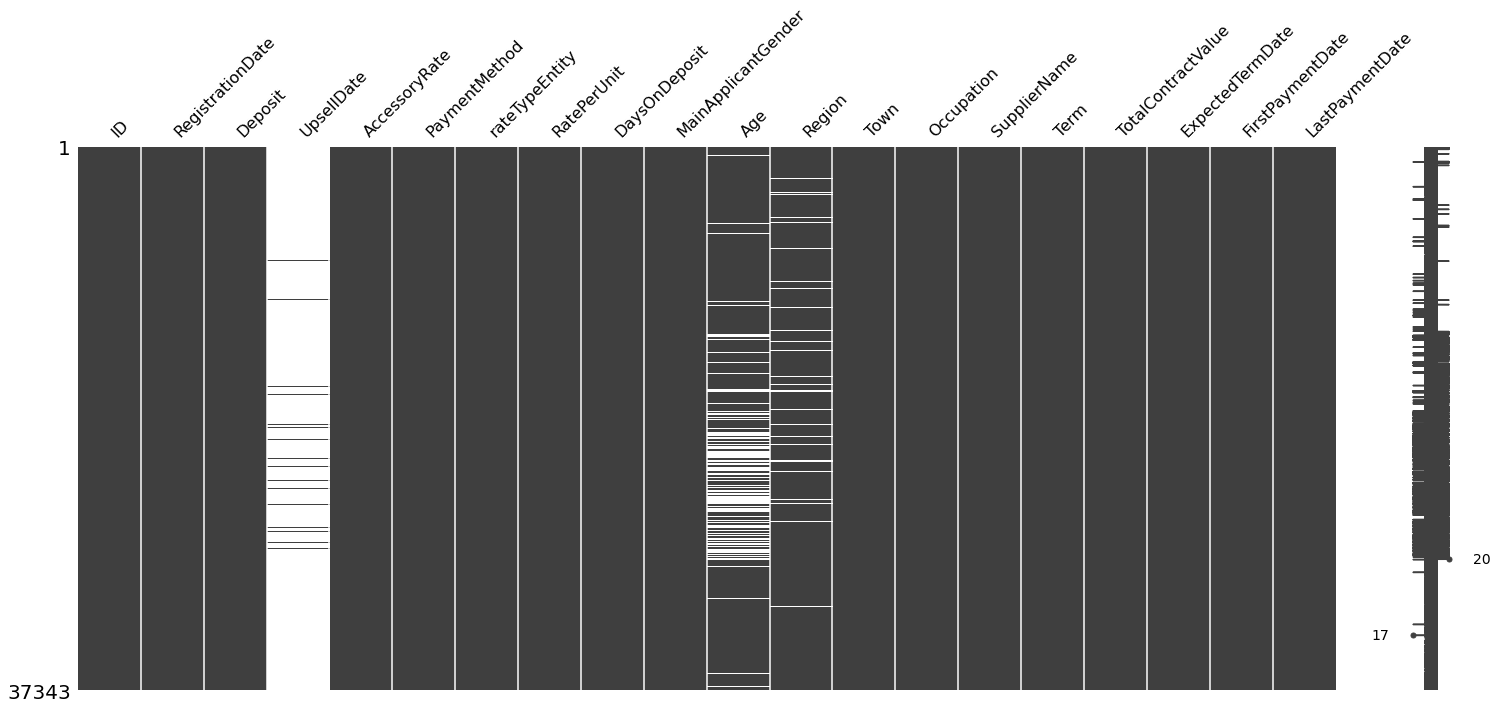

In [23]:
msno.matrix(metadata)
metadata.shape

Dropping UpsellDate because of too many missing values

In [24]:
metadata.drop(columns = "UpsellDate", inplace = True)

<AxesSubplot:>

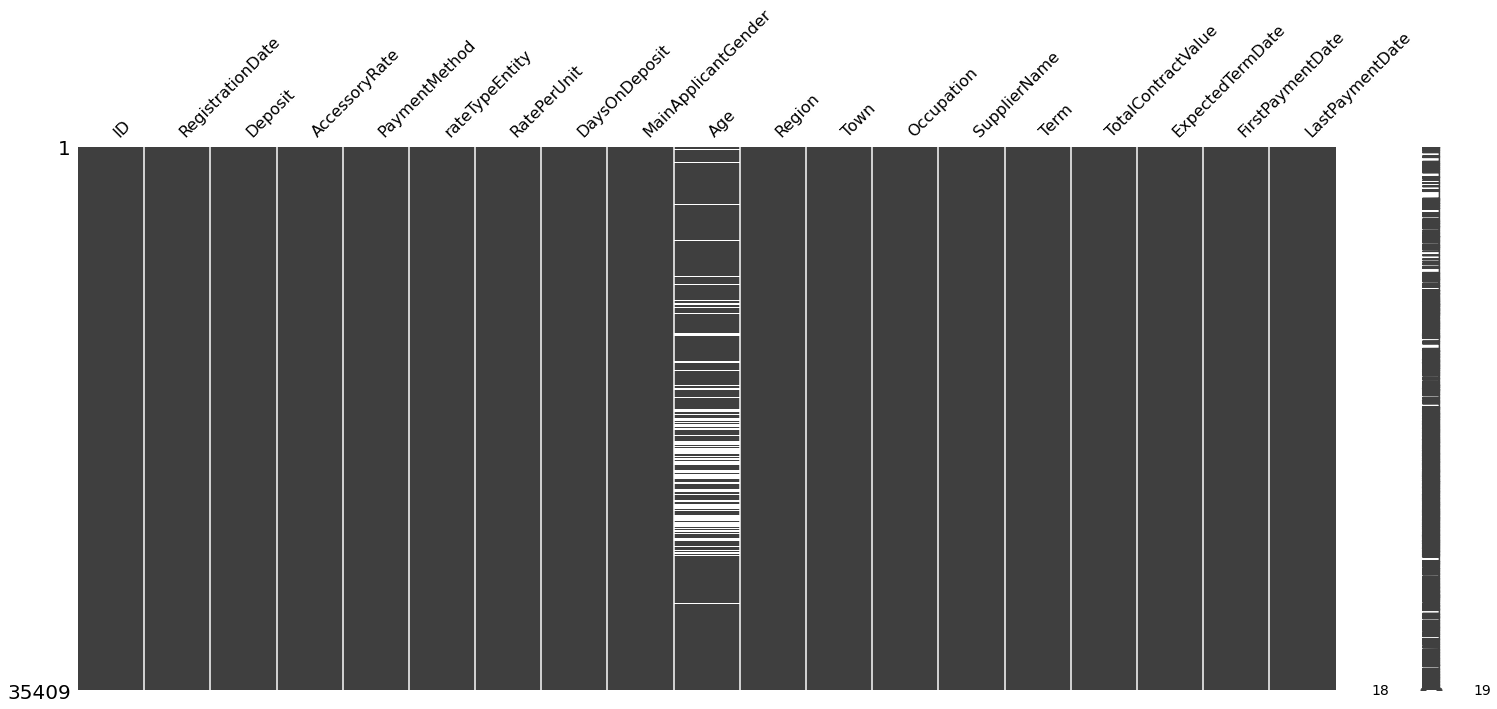

In [25]:
#metadata = metadata.loc[~(metadata.Age.isna())]
metadata = metadata.loc[~(metadata.Region.isna())]
msno.matrix(metadata)

In [26]:
metadata.columns
metadata.dtypes

ID                             object
RegistrationDate       datetime64[ns]
Deposit                         int64
AccessoryRate                 float64
PaymentMethod                category
rateTypeEntity               category
RatePerUnit                     int64
DaysOnDeposit                   int64
MainApplicantGender          category
Age                           float64
Region                         object
Town                           object
Occupation                     object
SupplierName                   object
Term                            int64
TotalContractValue            float64
ExpectedTermDate       datetime64[ns]
FirstPaymentDate       datetime64[ns]
LastPaymentDate        datetime64[ns]
dtype: object

<AxesSubplot:>

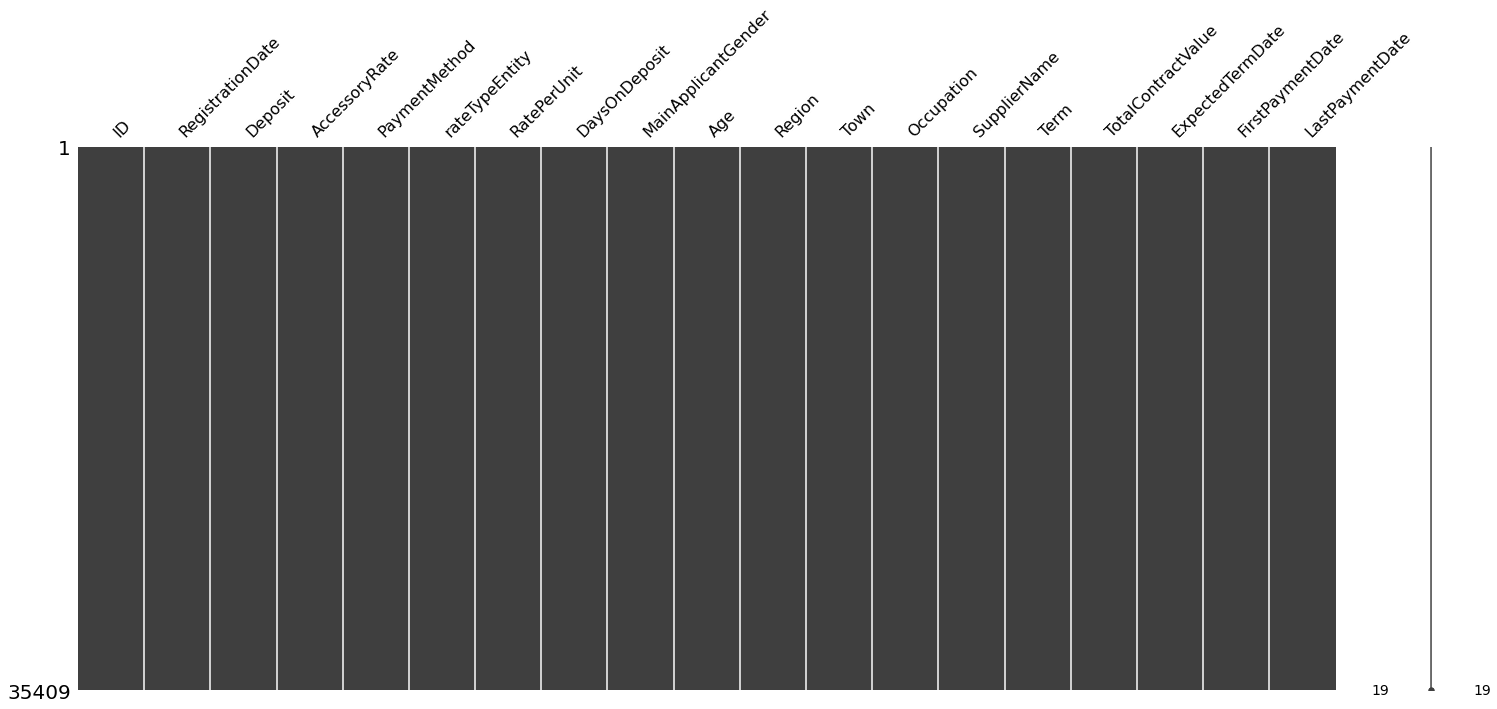

In [27]:
impute = metadata[['Deposit', 'AccessoryRate', 'RatePerUnit', 'DaysOnDeposit', 
                   'Term', 'TotalContractValue', 'Age']]
impute = impute.to_numpy()
impute = IterativeImputer().fit_transform(impute)
metadata.Age = impute[:,-1]
msno.matrix(metadata)

In [28]:
metadata.shape

(35409, 19)

In [29]:
metadata.Region.unique()

array(['Mount Kenya Region', 'Coast Region', 'Nairobi Region',
       'South Rift', 'Western', 'North Rift', 'Nyanza'], dtype=object)

In [30]:
metadata.describe()

,Deposit,AccessoryRate,RatePerUnit,DaysOnDeposit,Age,Term,TotalContractValue
count,35409.000000,35409.000000,35409.000000,35409.000000,35409.000000,35409.000000,35409.000000
mean,2347.555367,1.153972,50.080460,4.594651,39.071149,411.179841,22897.402101
std,416.300269,7.865970,59.018473,3.490186,11.156501,122.110545,10174.627770
min,0.000000,0.000000,35.000000,0.000000,19.000000,10.000000,10800.000000
25%,2000.000000,0.000000,40.000000,3.000000,31.000000,364.000000,16560.000000
50%,2000.000000,0.000000,40.000000,3.000000,39.217904,364.000000,16560.000000
75%,2500.000000,0.000000,55.000000,7.000000,44.000000,547.000000,33080.000000
max,8000.000000,240.000000,4000.000000,60.000000,120.000000,626.000000,64484.000000


<AxesSubplot:xlabel='Age'>

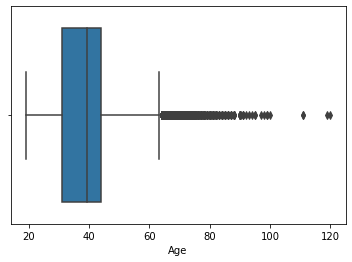

In [31]:
sns.boxplot(x=metadata.Age)

I removed everyone over the age of 90

In [32]:
metadata = metadata.loc[metadata.Age<=90] 

<AxesSubplot:xlabel='Age'>

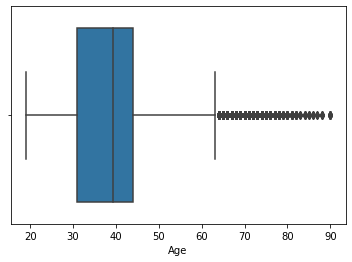

In [33]:
sns.boxplot(x=metadata.Age)

In [34]:
merged = pd.merge(left=metadata, right=pd.concat(objs=[train]).fillna(value=0.), on="ID")

In [35]:
merged

,ID,RegistrationDate,Deposit,AccessoryRate,PaymentMethod,rateTypeEntity,RatePerUnit,DaysOnDeposit,MainApplicantGender,Age,...,FirstPaymentDate,LastPaymentDate,TransactionDates,PaymentsHistory,m1,m2,m3,m4,m5,m6
0,ID_K00S4N4,2015-12-10 00:00:00,2000,0.0,FINANCED,DAILY,35,7,Male,41.0,...,2015-12-10 09:52:35,2016-10-23 04:52:30,"['12-2015', '01-2016', '02-2016', '03-2016', '...","[3050.0, 1050.0, 910.0, 1050.0, 1050.0]",1225.0,1050.0,1190.0,525.0,1750.0,1890.0
1,ID_102CV85,2015-12-18 00:00:00,2000,35.0,FINANCED,DAILY,35,7,Female,48.0,...,2015-12-18 06:22:34,2017-02-01 15:23:44,"['12-2015', '01-2016', '02-2016', '03-2016', '...","[4245.0, 980.0, 735.0, 735.0, 1470.0, 735.0, 9...",980.0,980.0,1225.0,980.0,935.0,355.0
2,ID_3K9VZ5J,2015-12-02 00:00:00,2000,0.0,FINANCED,DAILY,35,7,Female,56.0,...,2015-12-05 10:34:32,2017-05-12 16:50:52,"['12-2015', '01-2016', '02-2016', '03-2016', '...","[2750.0, 1000.0, 750.0, 1000.0, 955.0, 880.0, ...",630.0,805.0,700.0,855.0,245.0,775.0
3,ID_6YU5YRB,2015-12-10 00:00:00,2000,0.0,FINANCED,DAILY,35,7,Male,56.0,...,2015-12-10 15:15:16,2016-12-11 11:48:01,"['12-2015', '01-2016', '02-2016', '03-2016', '...","[3010.0, 665.0, 1035.0, 985.0, 1020.0, 1120.0,...",1050.0,985.0,1085.0,980.0,1770.0,90.0
4,ID_FK5A5E9,2015-12-11 00:00:00,2000,0.0,FINANCED,DAILY,35,7,Female,41.0,...,2015-12-11 10:34:10,2017-01-08 15:50:18,"['12-2015', '01-2016', '02-2016', '03-2016', '...","[4750.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000....",855.0,675.0,1015.0,950.0,920.0,325.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26545,ID_PIH3043,2020-02-20 18:19:04,2400,0.0,FINANCED,DAILY,50,3,Male,39.0,...,2020-02-20 18:19:11,2021-01-08 18:23:52,"['02-2020', '03-2020', '04-2020', '05-2020', '...","[2550.0, 1450.0, 1350.0, 250.0, 600.0, 950.0]",1550.0,1450.0,1500.0,1400.0,1050.0,300.0
26546,ID_OKJ96OW,2020-02-20 18:26:52,2400,0.0,FINANCED,DAILY,50,3,Female,38.0,...,2020-02-20 18:26:58,2020-12-19 07:16:44,"['02-2020', '03-2020', '04-2020', '05-2020', '...","[2680.0, 1240.0, 1230.0, 1100.0, 1400.0]",1300.0,650.0,950.0,1450.0,1500.0,900.0
26547,ID_5J9OMUP,2020-02-20 18:30:59,2400,0.0,FINANCED,DAILY,50,3,Male,23.0,...,2020-02-20 18:31:06,2021-05-18 16:07:49,"['02-2020', '03-2020', '04-2020', '05-2020', '...","[2700.0, 400.0, 950.0, 1150.0, 1150.0, 750.0, ...",1150.0,850.0,100.0,50.0,1200.0,50.0
26548,ID_J4I8Z2V,2020-02-20 18:42:26,3000,0.0,FINANCED,DAILY,40,3,Male,31.0,...,2020-02-20 18:42:33,2021-04-21 15:59:37,"['02-2020', '03-2020', '04-2020', '05-2020', '...","[3680.0, 600.0, 920.0, 920.0, 920.0, 1240.0, 1...",1040.0,640.0,800.0,840.0,1120.0,840.0


In [36]:
merged.dtypes

ID                             object
RegistrationDate       datetime64[ns]
Deposit                         int64
AccessoryRate                 float64
PaymentMethod                category
rateTypeEntity               category
RatePerUnit                     int64
DaysOnDeposit                   int64
MainApplicantGender          category
Age                           float64
Region                         object
Town                           object
Occupation                     object
SupplierName                   object
Term                            int64
TotalContractValue            float64
ExpectedTermDate       datetime64[ns]
FirstPaymentDate       datetime64[ns]
LastPaymentDate        datetime64[ns]
TransactionDates               object
PaymentsHistory                object
m1                            float64
m2                            float64
m3                            float64
m4                            float64
m5                            float64
m6          

I removed the columnns that only have one unique entry since it will not help building our model

In [37]:
colNames = merged.columns
for i in colNames:
    print(f'{i} has ', merged[f'{i}'].nunique(), ' values')
    if merged[f'{i}'].nunique() == 1:
        del merged[f'{i}']
merged    

ID has  26550  values
RegistrationDate has  26483  values
Deposit has  11  values
AccessoryRate has  17  values
PaymentMethod has  1  values
rateTypeEntity has  3  values
RatePerUnit has  11  values
DaysOnDeposit has  6  values
MainApplicantGender has  2  values
Age has  91  values
Region has  7  values
Town has  47  values
Occupation has  7  values
SupplierName has  1  values
Term has  43  values
TotalContractValue has  29  values
ExpectedTermDate has  26480  values
FirstPaymentDate has  26519  values
LastPaymentDate has  26263  values
TransactionDates has  6778  values
PaymentsHistory has  26401  values
m1 has  1375  values
m2 has  1420  values
m3 has  1468  values
m4 has  1523  values
m5 has  1554  values
m6 has  2339  values


,ID,RegistrationDate,Deposit,AccessoryRate,rateTypeEntity,RatePerUnit,DaysOnDeposit,MainApplicantGender,Age,Region,...,FirstPaymentDate,LastPaymentDate,TransactionDates,PaymentsHistory,m1,m2,m3,m4,m5,m6
0,ID_K00S4N4,2015-12-10 00:00:00,2000,0.0,DAILY,35,7,Male,41.0,Mount Kenya Region,...,2015-12-10 09:52:35,2016-10-23 04:52:30,"['12-2015', '01-2016', '02-2016', '03-2016', '...","[3050.0, 1050.0, 910.0, 1050.0, 1050.0]",1225.0,1050.0,1190.0,525.0,1750.0,1890.0
1,ID_102CV85,2015-12-18 00:00:00,2000,35.0,DAILY,35,7,Female,48.0,Nairobi Region,...,2015-12-18 06:22:34,2017-02-01 15:23:44,"['12-2015', '01-2016', '02-2016', '03-2016', '...","[4245.0, 980.0, 735.0, 735.0, 1470.0, 735.0, 9...",980.0,980.0,1225.0,980.0,935.0,355.0
2,ID_3K9VZ5J,2015-12-02 00:00:00,2000,0.0,DAILY,35,7,Female,56.0,Mount Kenya Region,...,2015-12-05 10:34:32,2017-05-12 16:50:52,"['12-2015', '01-2016', '02-2016', '03-2016', '...","[2750.0, 1000.0, 750.0, 1000.0, 955.0, 880.0, ...",630.0,805.0,700.0,855.0,245.0,775.0
3,ID_6YU5YRB,2015-12-10 00:00:00,2000,0.0,DAILY,35,7,Male,56.0,Mount Kenya Region,...,2015-12-10 15:15:16,2016-12-11 11:48:01,"['12-2015', '01-2016', '02-2016', '03-2016', '...","[3010.0, 665.0, 1035.0, 985.0, 1020.0, 1120.0,...",1050.0,985.0,1085.0,980.0,1770.0,90.0
4,ID_FK5A5E9,2015-12-11 00:00:00,2000,0.0,DAILY,35,7,Female,41.0,Mount Kenya Region,...,2015-12-11 10:34:10,2017-01-08 15:50:18,"['12-2015', '01-2016', '02-2016', '03-2016', '...","[4750.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000....",855.0,675.0,1015.0,950.0,920.0,325.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26545,ID_PIH3043,2020-02-20 18:19:04,2400,0.0,DAILY,50,3,Male,39.0,Nyanza,...,2020-02-20 18:19:11,2021-01-08 18:23:52,"['02-2020', '03-2020', '04-2020', '05-2020', '...","[2550.0, 1450.0, 1350.0, 250.0, 600.0, 950.0]",1550.0,1450.0,1500.0,1400.0,1050.0,300.0
26546,ID_OKJ96OW,2020-02-20 18:26:52,2400,0.0,DAILY,50,3,Female,38.0,Western,...,2020-02-20 18:26:58,2020-12-19 07:16:44,"['02-2020', '03-2020', '04-2020', '05-2020', '...","[2680.0, 1240.0, 1230.0, 1100.0, 1400.0]",1300.0,650.0,950.0,1450.0,1500.0,900.0
26547,ID_5J9OMUP,2020-02-20 18:30:59,2400,0.0,DAILY,50,3,Male,23.0,Nyanza,...,2020-02-20 18:31:06,2021-05-18 16:07:49,"['02-2020', '03-2020', '04-2020', '05-2020', '...","[2700.0, 400.0, 950.0, 1150.0, 1150.0, 750.0, ...",1150.0,850.0,100.0,50.0,1200.0,50.0
26548,ID_J4I8Z2V,2020-02-20 18:42:26,3000,0.0,DAILY,40,3,Male,31.0,Coast Region,...,2020-02-20 18:42:33,2021-04-21 15:59:37,"['02-2020', '03-2020', '04-2020', '05-2020', '...","[3680.0, 600.0, 920.0, 920.0, 920.0, 1240.0, 1...",1040.0,640.0,800.0,840.0,1120.0,840.0


In [38]:
merged.TransactionDates.squeeze().squeeze()

0        ['12-2015', '01-2016', '02-2016', '03-2016', '...
1        ['12-2015', '01-2016', '02-2016', '03-2016', '...
2        ['12-2015', '01-2016', '02-2016', '03-2016', '...
3        ['12-2015', '01-2016', '02-2016', '03-2016', '...
4        ['12-2015', '01-2016', '02-2016', '03-2016', '...
                               ...                        
26545    ['02-2020', '03-2020', '04-2020', '05-2020', '...
26546    ['02-2020', '03-2020', '04-2020', '05-2020', '...
26547    ['02-2020', '03-2020', '04-2020', '05-2020', '...
26548    ['02-2020', '03-2020', '04-2020', '05-2020', '...
26549    ['02-2020', '03-2020', '05-2020', '06-2020', '...
Name: TransactionDates, Length: 26550, dtype: object

<AxesSubplot:>

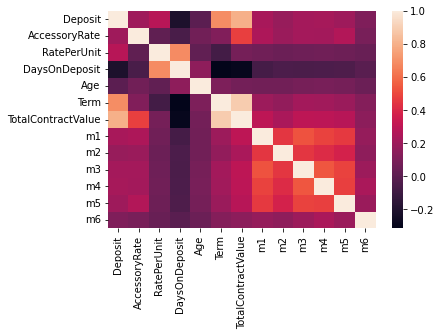

In [39]:
sns.heatmap(merged.corr())

In [40]:
merged.FirstPaymentDate = pd.to_datetime(merged['FirstPaymentDate']).dt.date
merged.RegistrationDate = pd.to_datetime(merged['RegistrationDate']).dt.date
merged.LastPaymentDate = pd.to_datetime(merged['LastPaymentDate']).dt.date
merged

,ID,RegistrationDate,Deposit,AccessoryRate,rateTypeEntity,RatePerUnit,DaysOnDeposit,MainApplicantGender,Age,Region,...,FirstPaymentDate,LastPaymentDate,TransactionDates,PaymentsHistory,m1,m2,m3,m4,m5,m6
0,ID_K00S4N4,2015-12-10,2000,0.0,DAILY,35,7,Male,41.0,Mount Kenya Region,...,2015-12-10,2016-10-23,"['12-2015', '01-2016', '02-2016', '03-2016', '...","[3050.0, 1050.0, 910.0, 1050.0, 1050.0]",1225.0,1050.0,1190.0,525.0,1750.0,1890.0
1,ID_102CV85,2015-12-18,2000,35.0,DAILY,35,7,Female,48.0,Nairobi Region,...,2015-12-18,2017-02-01,"['12-2015', '01-2016', '02-2016', '03-2016', '...","[4245.0, 980.0, 735.0, 735.0, 1470.0, 735.0, 9...",980.0,980.0,1225.0,980.0,935.0,355.0
2,ID_3K9VZ5J,2015-12-02,2000,0.0,DAILY,35,7,Female,56.0,Mount Kenya Region,...,2015-12-05,2017-05-12,"['12-2015', '01-2016', '02-2016', '03-2016', '...","[2750.0, 1000.0, 750.0, 1000.0, 955.0, 880.0, ...",630.0,805.0,700.0,855.0,245.0,775.0
3,ID_6YU5YRB,2015-12-10,2000,0.0,DAILY,35,7,Male,56.0,Mount Kenya Region,...,2015-12-10,2016-12-11,"['12-2015', '01-2016', '02-2016', '03-2016', '...","[3010.0, 665.0, 1035.0, 985.0, 1020.0, 1120.0,...",1050.0,985.0,1085.0,980.0,1770.0,90.0
4,ID_FK5A5E9,2015-12-11,2000,0.0,DAILY,35,7,Female,41.0,Mount Kenya Region,...,2015-12-11,2017-01-08,"['12-2015', '01-2016', '02-2016', '03-2016', '...","[4750.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000....",855.0,675.0,1015.0,950.0,920.0,325.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26545,ID_PIH3043,2020-02-20,2400,0.0,DAILY,50,3,Male,39.0,Nyanza,...,2020-02-20,2021-01-08,"['02-2020', '03-2020', '04-2020', '05-2020', '...","[2550.0, 1450.0, 1350.0, 250.0, 600.0, 950.0]",1550.0,1450.0,1500.0,1400.0,1050.0,300.0
26546,ID_OKJ96OW,2020-02-20,2400,0.0,DAILY,50,3,Female,38.0,Western,...,2020-02-20,2020-12-19,"['02-2020', '03-2020', '04-2020', '05-2020', '...","[2680.0, 1240.0, 1230.0, 1100.0, 1400.0]",1300.0,650.0,950.0,1450.0,1500.0,900.0
26547,ID_5J9OMUP,2020-02-20,2400,0.0,DAILY,50,3,Male,23.0,Nyanza,...,2020-02-20,2021-05-18,"['02-2020', '03-2020', '04-2020', '05-2020', '...","[2700.0, 400.0, 950.0, 1150.0, 1150.0, 750.0, ...",1150.0,850.0,100.0,50.0,1200.0,50.0
26548,ID_J4I8Z2V,2020-02-20,3000,0.0,DAILY,40,3,Male,31.0,Coast Region,...,2020-02-20,2021-04-21,"['02-2020', '03-2020', '04-2020', '05-2020', '...","[3680.0, 600.0, 920.0, 920.0, 920.0, 1240.0, 1...",1040.0,640.0,800.0,840.0,1120.0,840.0


In [66]:
minMonth = min(merged.FirstPaymentDate)
maxMonth = max(merged.LastPaymentDate)
monthlist = pd.date_range(minMonth,maxMonth, freq='MS').strftime("%Y-%m").tolist()
monthlist = [f'{minMonth.strftime("%Y-%m")}']+monthlist
merged.shape

(26550, 25)

In [71]:
for month in monthlist:
    merged[f'{month}'] = np.zeros(merged.shape[0])

In [73]:
merged.columns

Index(['ID', 'RegistrationDate', 'Deposit', 'AccessoryRate', 'rateTypeEntity',
       'RatePerUnit', 'DaysOnDeposit', 'MainApplicantGender', 'Age', 'Region',
       'Town', 'Occupation', 'Term', 'TotalContractValue', 'ExpectedTermDate',
       'FirstPaymentDate', 'LastPaymentDate', 'TransactionDates',
       'PaymentsHistory', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', '2015-11',
       '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05',
       '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11',
       '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05',
       '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11',
       '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05',
       '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11',
       '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05',
       '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11',
       '2019-12', '2020-01', '2020-02', 